## Effect of Smoothing
-  Examines impact of spatial/temporal smoothing on place cell detection
- Analyzes how smoothing affects spatial information score and ANOVA F-statistics


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from convnwb.io import get_files, load_jsons_to_df
from scipy.stats import binom_test

from spiketools.plts.data import plot_hist
from spiketools.plts.utils import make_grid, get_grid_subplot,save_figure
from spiketools.plts.style import drop_spines
from spiketools.utils.run import create_methods_list

In [2]:
import seaborn as sns
sns.set_context('talk', font_scale=0.9)

In [3]:

import sys
sys.path.append('../scripts')
from settings import  PATHS, METHODS

In [4]:
results_folder = PATHS['RESULTS'] / 'units'
reports_folder = PATHS['REPORTS'] / 'units'


In [5]:
# Get the list of files
res_files = get_files(results_folder, select='mat')

In [6]:
# Collect all unit results together into a dataframe
all_results = load_jsons_to_df(res_files, folder=results_folder)

In [7]:
# Check the columns
all_results.columns

Index(['unit_ind', 'session_id', 'label', 'spike_name', 'place_bins',
       'spike_position', 'trial_changes', 'trial_Num', 'trial_place_bins',
       'place_sem', 'trial_fr', 'fr_bins', 'fr_sem', 's_bins', 'place_info',
       'place_fr_info', 'place_anova', 'place_fr_anova',
       'place_anova_surr_p_val', 'place_anova_surr_z_score',
       'place_info_surr_p_val', 'place_info_surr_z_score',
       'place_fr_anova_surr_p_val', 'place_fr_anova_surr_z_score',
       'place_fr_info_surr_p_val', 'place_fr_info_surr_z_score'],
      dtype='object')

## Dropped Neurons 

In [8]:
from copy import deepcopy

# Display the original dataframe before filtering
print("Original dataframe shape:", all_results.shape)
print(all_results.columns)
all_results['firing_rate'] = all_results['place_bins'].apply(lambda x: np.mean(x))


all_results = all_results[all_results['firing_rate'].astype(float) < 20]
all_results = all_results[all_results['firing_rate'].astype(float) > .1]
# Display the filtered dataframe
print("\nFiltered dataframe shape:", all_results.shape)

Original dataframe shape: (390, 26)
Index(['unit_ind', 'session_id', 'label', 'spike_name', 'place_bins',
       'spike_position', 'trial_changes', 'trial_Num', 'trial_place_bins',
       'place_sem', 'trial_fr', 'fr_bins', 'fr_sem', 's_bins', 'place_info',
       'place_fr_info', 'place_anova', 'place_fr_anova',
       'place_anova_surr_p_val', 'place_anova_surr_z_score',
       'place_info_surr_p_val', 'place_info_surr_z_score',
       'place_fr_anova_surr_p_val', 'place_fr_anova_surr_z_score',
       'place_fr_info_surr_p_val', 'place_fr_info_surr_z_score'],
      dtype='object')

Filtered dataframe shape: (298, 27)


## Check Results 

In [9]:
# Get total number of units
n_units = len(all_results)
print('Total number of cells: {}'.format(n_units))

Total number of cells: 298


In [10]:
analyses = create_methods_list(METHODS)
# Statistics settings
alpha_level = 0.05
binom_sidedness = 'greater'    # 'two-sided', 'greater', 'less'

In [11]:

#     print(all_results[f'{analysis}_surr_p_val'])
   # Collect numbers of significant cells
results = {}
for analysis in analyses:
    all_results[f'is_{analysis}'] = (all_results[f'{analysis}_surr_p_val'] < alpha_level).values #results[analysis] = sum(all_results['is_' + analysis])

In [12]:
for analysis in analyses:
     results[analysis] = sum(all_results['is_' + analysis])

In [13]:
# Compute significance of the counts of detected neurons
stats = {}
for analysis in analyses:
    stats[analysis] = binom_test(results[analysis], n_units, alpha_level, binom_sidedness)

/var/folders/tx/9bxcz_2j6m79n4dmyyw6s2zm0000gn/T/ipykernel_49680/2198180662.py:4: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats[analysis] = binom_test(results[analysis], n_units, alpha_level, binom_sidedness)


In [14]:
# Check the number & percent of significant cells per analysis
print('total cells: {}\n'.format( n_units))
for analysis in analyses:
    print('# {} cells:     \t\t{:3d}  ({:5.2f}%) \t\t {:.4f}'.format(\
        analysis, results[analysis], results[analysis] / n_units * 100, stats[analysis]))

total cells: 298

# place_anova cells:     		 66  (22.15%) 		 0.0000
# place_info cells:     		 66  (22.15%) 		 0.0000


## Effect of Smoothing

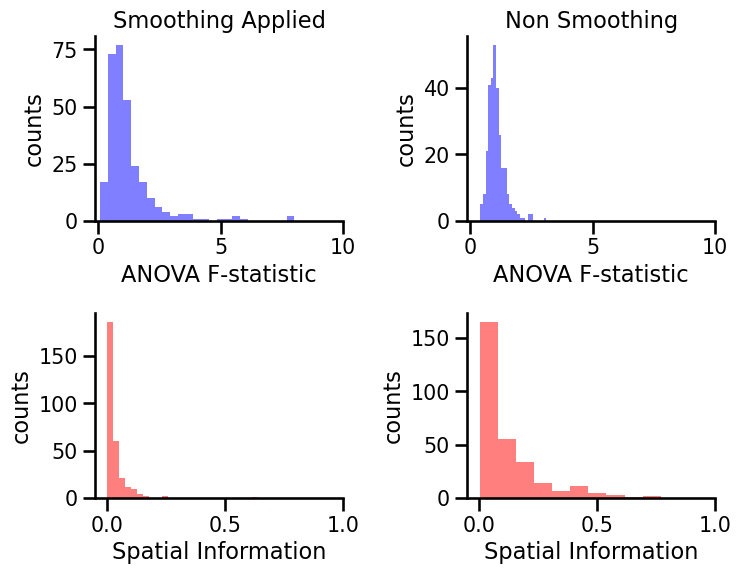

In [15]:

grid = make_grid(2, 2, wspace=.5, hspace=.5, figsize=(8, 6))
plt.rcParams.update({'font.size': 50})

ax = get_grid_subplot(grid, 0, 0)
plot_hist(all_results['place_anova'].values, bins=25, color='blue', alpha=0.5, 
         xlabel='ANOVA F-statistic', ylabel='counts',title = 'Smoothing Applied', ax=ax)
ax.set_xlim(-.1, 10)
drop_spines(['top','right'],ax=ax)    

ax = get_grid_subplot(grid, 1, 0)
plot_hist(all_results['place_info'].values, bins=25, color='red', alpha=0.5,
         xlabel='Spatial Information', ylabel='counts', ax=ax)
ax.set_xlim(-.05, 1)
drop_spines(['top','right'],ax=ax)

ax = get_grid_subplot(grid, 0, 1)
plot_hist(all_results['place_fr_anova'].values, bins=25, color='blue', alpha=0.5,
         xlabel='ANOVA F-statistic', ylabel='counts', title = 'Non Smoothing',ax=ax)
ax.set_xlim(-.1, 10)
drop_spines(['top','right'],ax=ax)

ax = get_grid_subplot(grid, 1, 1) 
plot_hist(all_results['place_fr_info'].values, bins=25, color='red', alpha=0.5,
         xlabel='Spatial Information', ylabel='counts', ax=ax)
ax.set_xlim(-.05, 1)
drop_spines(['top','right'],ax=ax)


save_figure('STATS_Distribution_smooth_vs_non_smooth',file_path='/Users/weijiazhang/Plots/PLDM/Human')


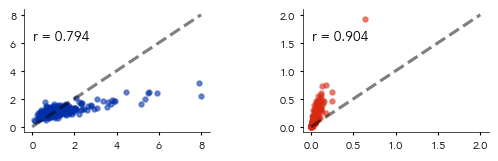

In [35]:
# Create a pairwise scatter plot comparing smoothed vs non-smoothed ANOVA F-statistics
grid = make_grid(2, 2, wspace=.5, hspace=.5,  figsize=(6, 4),
                 )

plt.rcParams.update({
    'font.family': 'Avenir',
    'font.size': 10,
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 8,  # Smaller tick label size
    'ytick.labelsize': 8,  # Smaller tick label size
    'axes.linewidth': 0.5,  # Reduce the thickness of axis lines
    'xtick.major.width': 0.8,  # Thinner x ticks
    'ytick.major.width': 0.8,  # Thinner y ticks
    'xtick.major.size': 2.0,   # Shorter x ticks
    'ytick.major.size': 2.0    # Shorter y ticks
})

anova_color = '#002FA7'  # Deep blue for ANOVA
info_color = '#D92911'   # Deep red for Spatial Inf
ax = get_grid_subplot(grid,0,0)
ax.scatter(all_results['place_anova'], all_results['place_fr_anova'], alpha=0.5,s = 10,color = anova_color)
ax.plot([0, 8], [0, 8], 'k--', alpha=0.5)  # Add identity line
# ax.set_xlabel('Smoothed')
# ax.set_ylabel('Non-smoothed')
# ax.set_title('ANOVA F-statistic')
drop_spines(['top','right'])

corr = np.corrcoef(all_results['place_anova'], all_results['place_fr_anova'])[0, 1]
ax.annotate(f'r = {corr:.3f}', xy=(0.05, 0.75), xycoords='axes fraction' )


ax = get_grid_subplot(grid,0,1)
ax.scatter(all_results['place_info'], all_results['place_fr_info'], alpha=0.5,s = 10,color = info_color )
ax.plot([0, 2], [0, 2], 'k--', alpha=0.5)  # Add identity line
# ax.set_xlabel('Smoothed')
# ax.set_ylabel('Non-smoothed')
# ax.set_title('Spatial Information')
drop_spines(['top','right'])

corr = np.corrcoef(all_results['place_info'], all_results['place_fr_info'])[0, 1]
ax.annotate(f'r = {corr:.3f}', xy=(0.05, 0.75), xycoords='axes fraction' )


save_figure('STATS_Pairwise_ANOVA_smooth_vs_non_smooth.pdf', file_path='/Users/weijiazhang/Plots/PLDM/Human')